# Aalysis of country-wise ebola data.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')

## Loading data.

In [2]:
data1=pd.read_csv("country_timeseries.csv")
data1.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


## Checking shape of data.

In [3]:
data1.shape

(122, 18)

## Checking the details of rows and columns of the data.

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.3+ KB


## Melting the data to bring to a proper format.

In [5]:
data=pd.melt(data1,id_vars=['Date',"Day"],var_name=['country'],value_name="value")
data.head()

,Date,Day,country,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


## Checking the shape of melted data.

In [6]:
data.shape

(1952, 4)

## Finding the number of missing values in our data.

In [7]:
data.isnull().sum()

Date          0
Day           0
country       0
value      1214
dtype: int64

## Dropping the missing values and resetting the index.

In [8]:
data.dropna(inplace = True)
data.reset_index(inplace=True, drop=True)
data.head()

,Date,Day,country,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,12/31/2014,284,Cases_Guinea,2730.0
4,12/28/2014,281,Cases_Guinea,2706.0


## Checking the shape of data.

In [9]:
data.shape

(738, 4)

In [10]:
## Finding if any missing value is there.

In [11]:
data.isnull().values.any()

False

## Separating cases and deaths from country name for a proper formatting.

In [12]:
country=data["country"].str.split("_", n = 1, expand = True)
country.head()

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


## Assigning country name to column "Country" and cases, deaths to column "Type".

In [13]:
data["Country"]=country[1]
data["Type"]=country[0]
data.head()

,Date,Day,country,value,Country,Type
0,1/5/2015,289,Cases_Guinea,2776.0,Guinea,Cases
1,1/4/2015,288,Cases_Guinea,2775.0,Guinea,Cases
2,1/3/2015,287,Cases_Guinea,2769.0,Guinea,Cases
3,12/31/2014,284,Cases_Guinea,2730.0,Guinea,Cases
4,12/28/2014,281,Cases_Guinea,2706.0,Guinea,Cases


## Dropping column "country" since we have added column "Country" after separating country from cases.

In [14]:
data=data.drop(['country'],axis=1)
data.head()

,Date,Day,value,Country,Type
0,1/5/2015,289,2776.0,Guinea,Cases
1,1/4/2015,288,2775.0,Guinea,Cases
2,1/3/2015,287,2769.0,Guinea,Cases
3,12/31/2014,284,2730.0,Guinea,Cases
4,12/28/2014,281,2706.0,Guinea,Cases


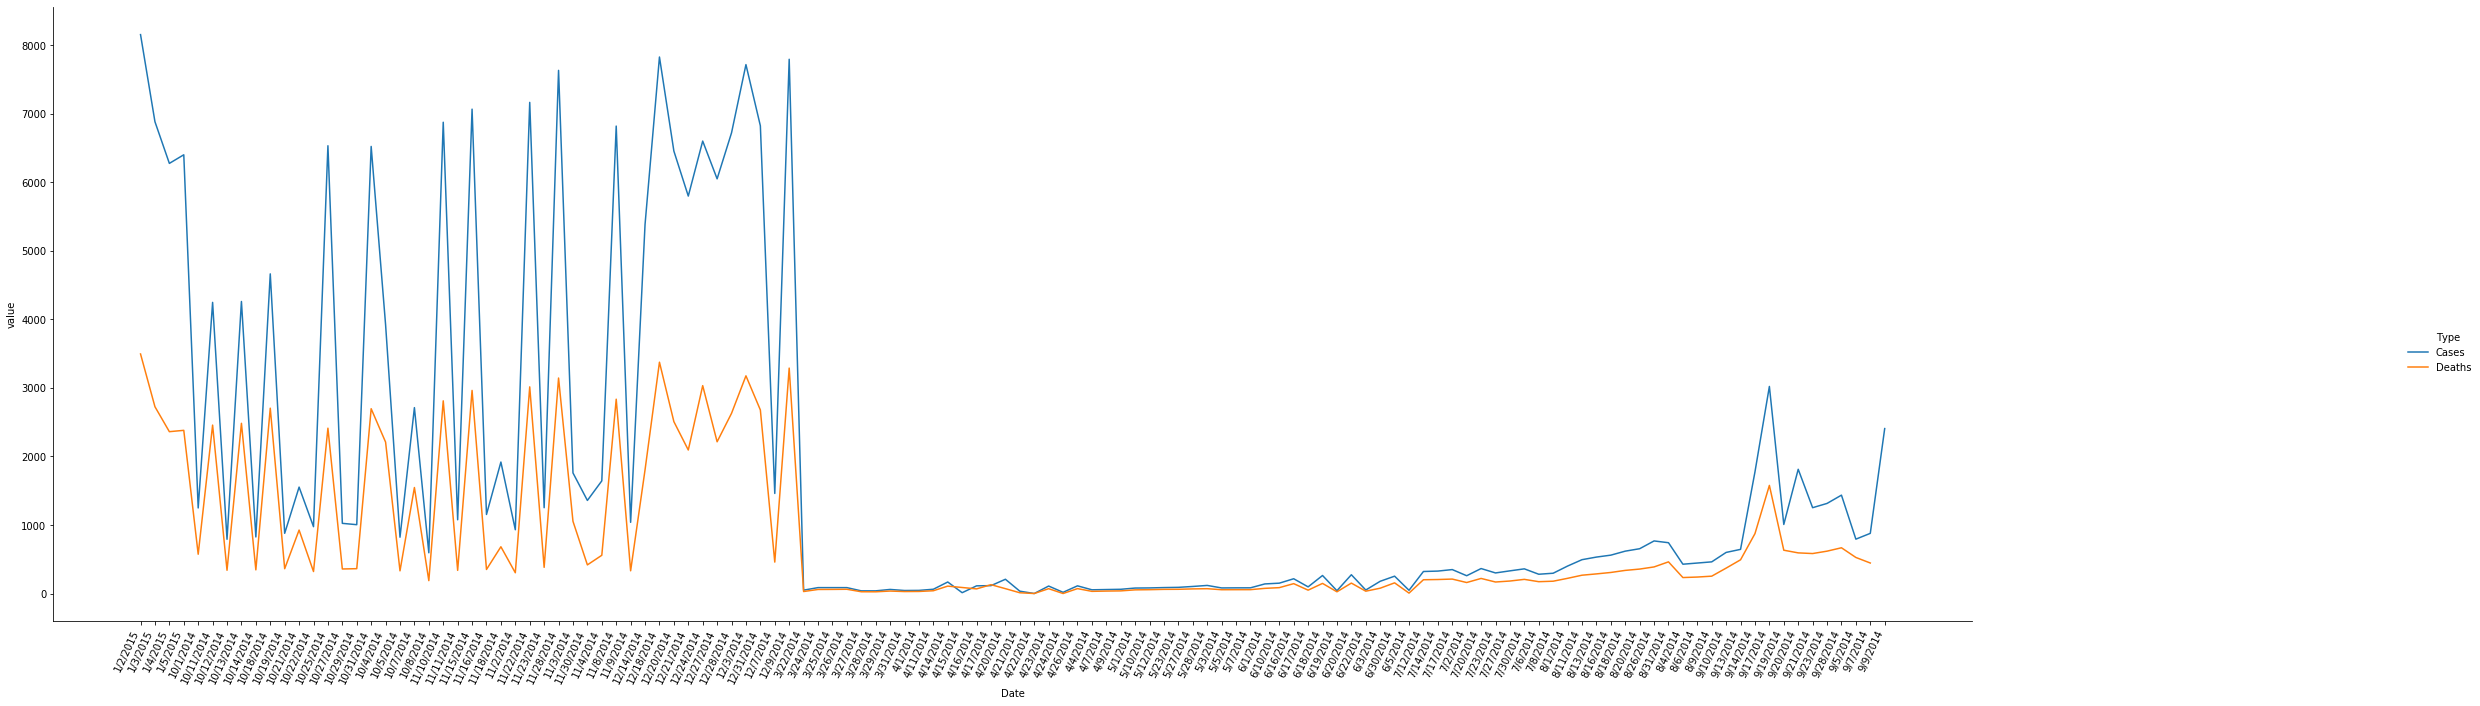

In [15]:
g = sns.relplot(x="Date", y="value", kind="line", hue="Type",data=data, ci = None);
g.fig.set_size_inches(40,10)
g.set_xticklabels(rotation=65, horizontalalignment='right');

## Checking data info.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 5 columns):
Date       738 non-null object
Day        738 non-null int64
value      738 non-null float64
Country    738 non-null object
Type       738 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 29.0+ KB


## Coverting "Date" to datetime64[ns] format.

In [17]:
data['Date']=pd.to_datetime(data['Date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 5 columns):
Date       738 non-null datetime64[ns]
Day        738 non-null int64
value      738 non-null float64
Country    738 non-null object
Type       738 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 29.0+ KB
None


## Checking if "Type" contains any other object except "cases" and "deaths".

In [18]:
data.Type.unique()

array(['Cases', 'Deaths'], dtype=object)

## Creating two data frames "data_case" and "data_death" by separating on the basis of "Type".
### Restting th eindex for both.

In [19]:
data_case = data[data['Type'] == "Cases"]
data_death = data[data['Type'] == "Deaths"]
data_case.reset_index(inplace=True, drop=True)
data_death .reset_index(inplace=True, drop=True)
print(data_case.head())
print()
print(data_death.head())

        Date  Day   value Country   Type
0 2015-01-05  289  2776.0  Guinea  Cases
1 2015-01-04  288  2775.0  Guinea  Cases
2 2015-01-03  287  2769.0  Guinea  Cases
3 2014-12-31  284  2730.0  Guinea  Cases
4 2014-12-28  281  2706.0  Guinea  Cases

        Date  Day   value Country    Type
0 2015-01-05  289  1786.0  Guinea  Deaths
1 2015-01-04  288  1781.0  Guinea  Deaths
2 2015-01-03  287  1767.0  Guinea  Deaths
3 2014-12-31  284  1739.0  Guinea  Deaths
4 2014-12-28  281  1708.0  Guinea  Deaths


## Dropping column "Type" from both the dataframes since we have already separated on the basis of "Type".

In [20]:
data_case=data_case.drop(['Type'],axis=1)
data_case.head()

,Date,Day,value,Country
0,2015-01-05,289,2776.0,Guinea
1,2015-01-04,288,2775.0,Guinea
2,2015-01-03,287,2769.0,Guinea
3,2014-12-31,284,2730.0,Guinea
4,2014-12-28,281,2706.0,Guinea


In [21]:
data_death=data_death.drop(['Type'],axis=1)
data_death.head()

,Date,Day,value,Country
0,2015-01-05,289,1786.0,Guinea
1,2015-01-04,288,1781.0,Guinea
2,2015-01-03,287,1767.0,Guinea
3,2014-12-31,284,1739.0,Guinea
4,2014-12-28,281,1708.0,Guinea


## Changing the column names in bth the data frames according to "Type".

In [22]:
data_case.rename(columns={'value':'Cases'}, inplace=True)
data_death.rename(columns={'value':'Deaths'}, inplace=True)
data_case.head()

,Date,Day,Cases,Country
0,2015-01-05,289,2776.0,Guinea
1,2015-01-04,288,2775.0,Guinea
2,2015-01-03,287,2769.0,Guinea
3,2014-12-31,284,2730.0,Guinea
4,2014-12-28,281,2706.0,Guinea


## Checking the data info for both.

In [23]:
data_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
Date       372 non-null datetime64[ns]
Day        372 non-null int64
Cases      372 non-null float64
Country    372 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [24]:
data_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
Date       366 non-null datetime64[ns]
Day        366 non-null int64
Deaths     366 non-null float64
Country    366 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.6+ KB


## Calculating the stastistics of both the dataframes.

In [25]:
data_case.describe()

,Day,Cases
count,372.000000,372.000000
mean,158.556452,1318.610215
std,81.569441,2360.041913
min,0.000000,0.000000
25%,100.000000,7.000000
50%,172.000000,185.000000
75%,225.000000,1436.000000
max,289.000000,10030.000000


In [26]:
data_death.describe()

,Day,Deaths
count,366.000000,366.000000
mean,158.887978,550.975410
std,81.424651,878.055721
min,0.000000,0.000000
25%,100.500000,4.000000
50%,175.000000,112.000000
75%,225.000000,630.000000
max,289.000000,3496.000000


## Checking the maximum, minimum number of cases, deaths and correspodnng countries.

In [27]:
max_num_case = data_case.groupby(['Country']).Cases.sum().max()
print('The maximum reported cases were: ', max_num_case)

The maximum reported cases were:  211181.0


In [28]:
max_country_case = data_case.groupby(['Country']).Cases.sum().idxmax()
print('The maximum cases were reported at: ', max_country_case)

The maximum cases were reported at:  SierraLeone


In [29]:
max_num_death = data_death.groupby(['Country']).Deaths.sum().max()
print('The maximum reported deaths were: ', max_num_death)

The maximum reported deaths were:  89198.0


In [30]:
max_country_death = data_death.groupby(['Country']).Deaths.sum().idxmax()
print('The maximum reported deaths were: ', max_country_death)

The maximum reported deaths were:  Liberia


In [31]:
min_num_case = data_case.groupby(['Country']).Cases.sum().min()
print('The minimum reported cases were: ', min_num_case)

The minimum reported cases were:  16.0


In [32]:
min_country_case = data_case.groupby(['Country']).Cases.sum().idxmin()
print('The minimum cases were reported at: ', min_country_case)

The minimum cases were reported at:  Spain


In [33]:
min_num_death = data_death.groupby(['Country']).Deaths.sum().min()
print('The minimum reported cases were: ', min_num_death)

The minimum reported cases were:  0.0


In [34]:
min_country_death = data_death.groupby(['Country']).Deaths.sum().idxmin()
print('The minimum cases were reported at: ', min_country_death)

The minimum cases were reported at:  Senegal


## Sorting both the case and death data for countries on ths basis of total cases and deaths.

In [35]:
data_case.groupby(['Country']).Cases.sum().sort_values(ascending=False)

Country
SierraLeone     211181.0
Liberia         193833.0
Guinea           84729.0
Nigeria            636.0
UnitedStates        59.0
Mali                42.0
Senegal             27.0
Spain               16.0
Name: Cases, dtype: float64

In [36]:
data_death.groupby(['Country']).Deaths.sum().sort_values(ascending=False)

Country
Liberia         89198.0
SierraLeone     60352.0
Guinea          51818.0
Nigeria           233.0
Mali               38.0
UnitedStates       15.0
Spain               3.0
Senegal             0.0
Name: Deaths, dtype: float64

## Finding the country with maximum cases and deaths and also the corresponding date.

In [37]:
data_case.sort_values('Cases',ascending=False)[0:1]

,Date,Day,Cases,Country
176,2015-01-05,289,10030.0,SierraLeone


In [38]:
data_death.sort_values('Deaths',ascending=False)[0:1]

,Date,Day,Deaths,Country
93,2015-01-02,286,3496.0,Liberia


## Multiindexing both data set with index "Country" and "Date".

In [39]:
data_case_multi=data_case.set_index(['Country', 'Date'])
data_case_multi.head()

Day   Cases
Country Date                   
Guinea  2015-01-05  289  2776.0
        2015-01-04  288  2775.0
        2015-01-03  287  2769.0
        2014-12-31  284  2730.0
        2014-12-28  281  2706.0

In [40]:
data_death_multi=data_death.set_index(['Country', 'Date'])
data_death_multi.head()

Day  Deaths
Country Date                   
Guinea  2015-01-05  289  1786.0
        2015-01-04  288  1781.0
        2015-01-03  287  1767.0
        2014-12-31  284  1739.0
        2014-12-28  281  1708.0

## Copying case data to a new data set ebola data for our analysis.

In [41]:
data_ebola=data_case_multi.copy()
data_ebola.head()

Day   Cases
Country Date                   
Guinea  2015-01-05  289  2776.0
        2015-01-04  288  2775.0
        2015-01-03  287  2769.0
        2014-12-31  284  2730.0
        2014-12-28  281  2706.0

## Adding "Deaths" column from death data to ebola data as a new column.

In [42]:
data_ebola['Deaths']=data_death_multi['Deaths']
data_ebola.head(10)

Day   Cases  Deaths
Country Date                           
Guinea  2015-01-05  289  2776.0  1786.0
        2015-01-04  288  2775.0  1781.0
        2015-01-03  287  2769.0  1767.0
        2014-12-31  284  2730.0  1739.0
        2014-12-28  281  2706.0  1708.0
        2014-12-27  280  2695.0  1697.0
        2014-12-24  277  2630.0     NaN
        2014-12-21  273  2597.0  1607.0
        2014-12-20  272  2571.0  1586.0
        2014-12-14  267  2416.0  1525.0

## Checking the number of missing values in ebola data.

In [43]:
data_ebola.isnull().sum()

Day       0
Cases     0
Deaths    9
dtype: int64

## Dropping the missing values form ebola data.

In [44]:
data_ebola.dropna(inplace = True)
data_ebola.isnull().sum().sum()

0

In [45]:
data_ebola

Day   Cases  Deaths
Country Date                           
Guinea  2015-01-05  289  2776.0  1786.0
        2015-01-04  288  2775.0  1781.0
        2015-01-03  287  2769.0  1767.0
        2014-12-31  284  2730.0  1739.0
        2014-12-28  281  2706.0  1708.0
...                 ...     ...     ...
Mali    2014-11-04  227     1.0     1.0
        2014-11-02  225     1.0     1.0
        2014-10-29  220     1.0     1.0
        2014-10-27  218     1.0     1.0
        2014-10-22  214     1.0     1.0

[363 rows x 3 columns]

In [46]:
data_plot = data_ebola[['Cases', 'Deaths']]
data_plot.reset_index(inplace = True)
data_plot.head()

,Country,Date,Cases,Deaths
0,Guinea,2015-01-05,2776.0,1786.0
1,Guinea,2015-01-04,2775.0,1781.0
2,Guinea,2015-01-03,2769.0,1767.0
3,Guinea,2014-12-31,2730.0,1739.0
4,Guinea,2014-12-28,2706.0,1708.0


In [47]:
data_plot1 = data_plot.groupby('Country')['Cases', 'Deaths'].sum()
data_plot1.reset_index(inplace = True)
data_plot1.head()

,Country,Cases,Deaths
0,Guinea,82099.0,51818.0
1,Liberia,191351.0,87896.0
2,Mali,42.0,38.0
3,Nigeria,636.0,233.0
4,Senegal,24.0,0.0


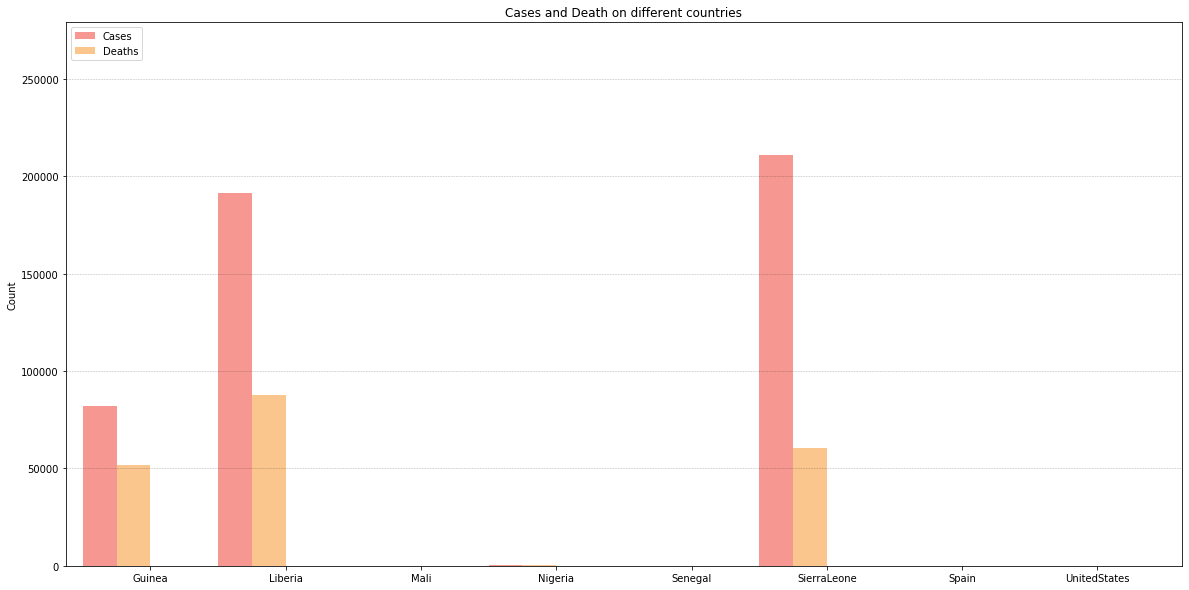

In [48]:
# Setting the positions and width for the bars
pos = list(range(len(data_plot1['Country']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        data_plot1['Cases'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label= data_plot1['Country'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        data_plot1['Deaths'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=data_plot1['Country'][1])  

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Cases and Death on different countries')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data_plot1['Country'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(data_plot1['Cases'] + data_plot1['Deaths'])])

# Adding the legend and showing the plot
plt.legend(['Cases', 'Deaths'], loc='upper left')
#plt.gcf().set_size_inches(20, 10)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.show()

In [49]:
data_plot2 = data_plot.groupby('Date')['Cases', 'Deaths'].sum()
data_plot2.reset_index(inplace = True)
data_plot2.head()

,Date,Cases,Deaths
0,2014-03-22,49.0,29.0
1,2014-03-24,86.0,59.0
2,2014-03-25,86.0,60.0
3,2014-03-26,86.0,62.0
4,2014-03-27,117.0,77.0


In [50]:
data_plot_2 = data_plot2[50:]
data_plot_2

,Date,Cases,Deaths
50,2014-07-27,1323.0,729.0
51,2014-07-30,1440.0,826.0
52,2014-08-01,1603.0,887.0
53,2014-08-04,1711.0,932.0
54,2014-08-06,1779.0,961.0
...,...,...,...
115,2014-12-31,20478.0,8037.0
116,2015-01-02,8157.0,3496.0
117,2015-01-03,20657.0,8178.0
118,2015-01-04,12555.0,4724.0


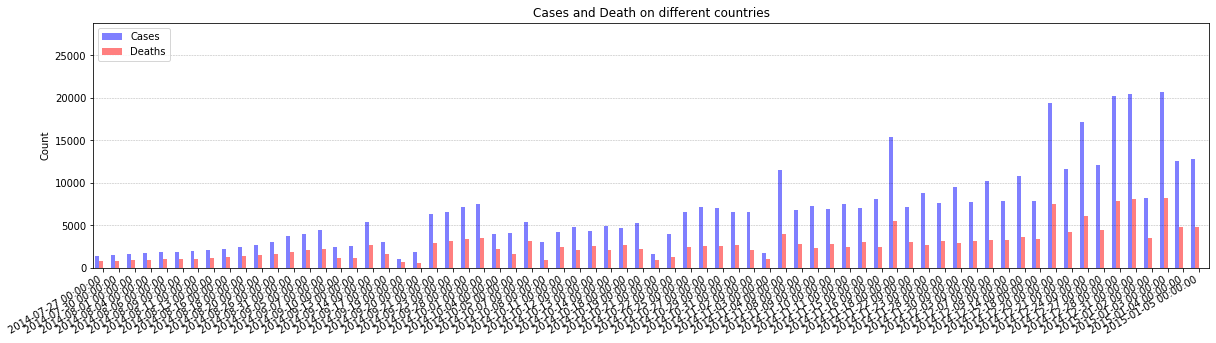

In [51]:
# Setting the positions and width for the bars
pos = list(range(len(data_plot_2['Cases']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        data_plot_2['Cases'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='Blue', 
        # with label the first value in first_name
        label= data_plot_2['Date']) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        data_plot_2['Deaths'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='Red', 
        # with label the second value in first_name
        label=data_plot_2['Date'])  

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Cases and Death on different countries')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(data_plot_2['Date'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(data_plot_2['Cases'] + data_plot_2['Deaths'])])

# Adding the legend and showing the plot
plt.legend(['Cases', 'Deaths'], loc='upper left')
#plt.gcf().set_size_inches(20, 5)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.autofmt_xdate()
plt.show()

## Finding the ebola data for a specific country "Guinea"

In [52]:
data_ebola.loc["Guinea"].head()

,Day,Cases,Deaths
Date,,,
2015-01-05,289,2776.0,1786.0
2015-01-04,288,2775.0,1781.0
2015-01-03,287,2769.0,1767.0
2014-12-31,284,2730.0,1739.0
2014-12-28,281,2706.0,1708.0


## Getting the number of cases and deaths for a particular day for "Guinea".

In [53]:
data_ebola.loc["Guinea",'2015-01-05'].head()

Day        289.0
Cases     2776.0
Deaths    1786.0
Name: (Guinea, 2015-01-05 00:00:00), dtype: float64

## Finding the highest number of cases for each a country in a day.

In [54]:
max_case_in_day = data_case.groupby(['Country']).Cases.max()
max_case_in_day

Country
Guinea           2776.0
Liberia          8166.0
Mali                7.0
Nigeria            22.0
Senegal             3.0
SierraLeone     10030.0
Spain               1.0
UnitedStates        4.0
Name: Cases, dtype: float64

## Finding highest number of cases and correspoding day for each country.

In [55]:
case_date = data_case.groupby(['Country'])['Date','Cases'].max()
case_date.reset_index(inplace = True)
case_date

,Country,Date,Cases
0,Guinea,2015-01-05,2776.0
1,Liberia,2015-01-03,8166.0
2,Mali,2014-12-07,7.0
3,Nigeria,2014-12-07,22.0
4,Senegal,2014-12-07,3.0
5,SierraLeone,2015-01-05,10030.0
6,Spain,2014-12-07,1.0
7,UnitedStates,2014-12-07,4.0


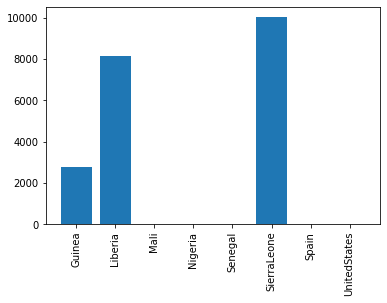

In [56]:
x = case_date['Country']
y = case_date['Cases']

fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, case_date['Country'], rotation='vertical')
plt.show()

## Finding highest number of deaths and correspoding day for each country.

In [57]:
death_date = data_death.groupby(['Country'])['Date','Deaths'].max()
death_date.reset_index(inplace = True)
death_date

,Country,Date,Deaths
0,Guinea,2015-01-05,1786.0
1,Liberia,2015-01-03,3496.0
2,Mali,2014-12-07,6.0
3,Nigeria,2014-12-07,8.0
4,Senegal,2014-12-07,0.0
5,SierraLeone,2015-01-05,2977.0
6,Spain,2014-12-07,1.0
7,UnitedStates,2014-12-07,1.0


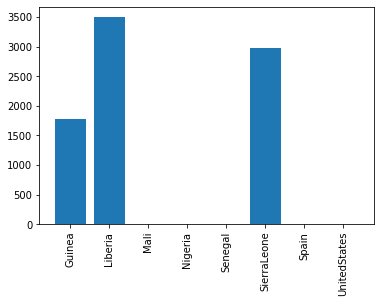

In [58]:
x = death_date['Country']
y = death_date['Deaths']

fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, death_date['Country'], rotation='vertical')
plt.show()

## Calculating correlation between "cases" and "deaths".

In [59]:
corrMatrix = np.corrcoef(data_ebola['Cases'],data_ebola['Deaths'])
corrMatrix

array([[1.        , 0.94490847],
       [0.94490847, 1.        ]])

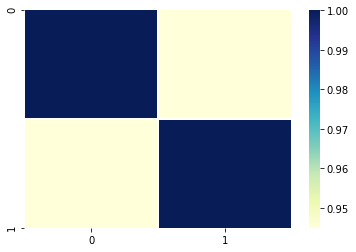

In [60]:
sns.heatmap(corrMatrix,  linewidths=.5, cmap="YlGnBu");

## Setting both case and death data index to date. (for plotting)

In [61]:
data_case.set_index('Date', drop=True,inplace=True)

In [62]:
data_case.head()

,Day,Cases,Country
Date,,,
2015-01-05,289,2776.0,Guinea
2015-01-04,288,2775.0,Guinea
2015-01-03,287,2769.0,Guinea
2014-12-31,284,2730.0,Guinea
2014-12-28,281,2706.0,Guinea


In [63]:
data_death.set_index('Date', drop=True,inplace=True)

In [64]:
data_death.head()

,Day,Deaths,Country
Date,,,
2015-01-05,289,1786.0,Guinea
2015-01-04,288,1781.0,Guinea
2015-01-03,287,1767.0,Guinea
2014-12-31,284,1739.0,Guinea
2014-12-28,281,1708.0,Guinea


## Listing all unique countries.

In [65]:
countries=data_ebola.index.unique(level=0).tolist()
countries

['Guinea',
 'Liberia',
 'SierraLeone',
 'Nigeria',
 'Senegal',
 'UnitedStates',
 'Spain',
 'Mali']

## Plotting cases and deaths due to ebola for different countries.

/Applications/ANACONDA/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


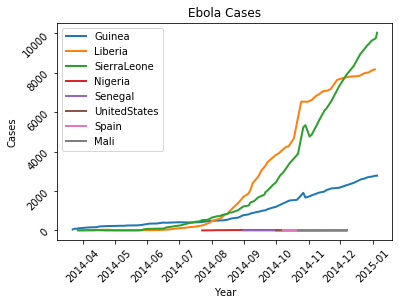

In [66]:
for country in countries:
    country_data = data_case[data_case['Country']  == country]
    sns.lineplot(data=country_data['Cases'],label=country, lw=2,size=2 )
    plt.xlabel('Year')
    plt.ylabel('Cases')
    plt.tick_params(labelrotation =45)
    plt.title('Ebola Cases')
    plt.legend(loc='best')

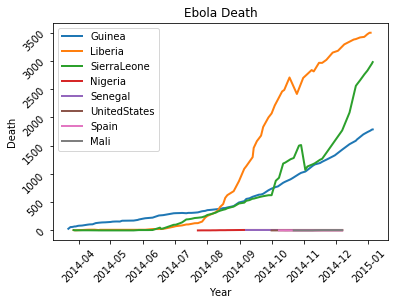

In [67]:
for country in countries:
    country_data = data_death[data_death['Country']  == country]
    sns.lineplot(data=country_data['Deaths'],label=country, lw=2,size=2 )
    plt.xlabel('Year')
    plt.ylabel('Death')
    plt.tick_params(labelrotation =45)
    plt.title('Ebola Death')
    plt.legend(loc='best')

## Plotting both cases and deaths in a sinlge plot.

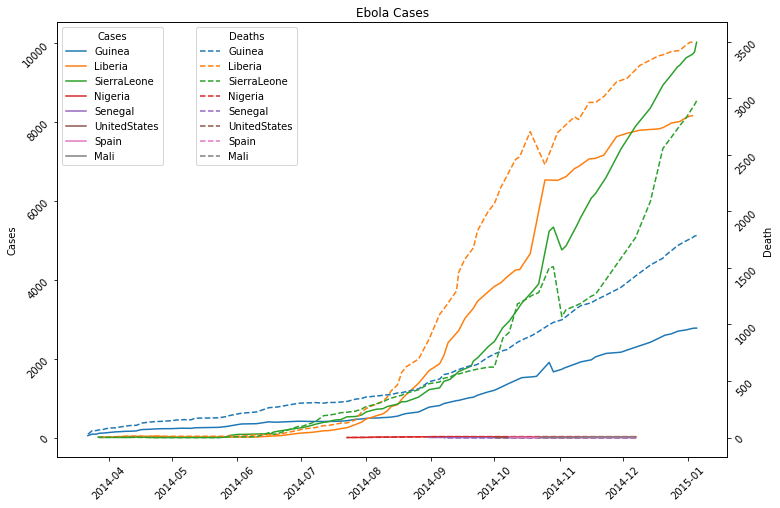

In [68]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.tick_params(labelrotation =45)
ax2.tick_params(labelrotation =45)
for country in countries:
    country_case_data = data_case[data_case['Country']  == country]
    country_death_data = data_death[data_death['Country']  == country]
    ax1.plot(country_case_data["Cases"], label=country)
    ax2.plot(country_death_data["Deaths"],'--',label=country)
plt.title('Ebola Cases')
fig.set_size_inches(w=12, h=8)
ax1.legend(loc='best', title = 'Cases')
ax1.set_ylabel('Cases')
ax2.set_ylabel('Death')
ax2.legend(loc='upper left',bbox_to_anchor=(0.2,1), title = 'Deaths')